### Analysis of networks generated from the Bianconi-Barabasi model

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import model
import fitness

import powerlaw
from scipy import stats

import networkx as nx

#### General parameters

In [5]:
n = 10000 # Number of nodes
m = 2 # Number of links for new nodes
m0 = 3 # Initial number of nodes

#### Network generated with a delta fitness distribution (BA model)

In [5]:
# Initialization
network_delta = model.network(m0, m)
network_delta.set_fitness_distr('delta')

In [6]:
# Generate the network
network_delta.generate_network(n)

# Get the degree distribution of the network
p_k_delta, k_delta = network_delta.get_degree_distr()

In [7]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_delta = np.delete(k_delta, np.argwhere(p_k_delta==0))
y_delta = np.delete(p_k_delta, np.argwhere(p_k_delta==0))
# Transform to log scale
x_delta = np.log10(x_delta)
y_delta = np.log10(y_delta)

# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(x_delta, y_delta)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 2.83


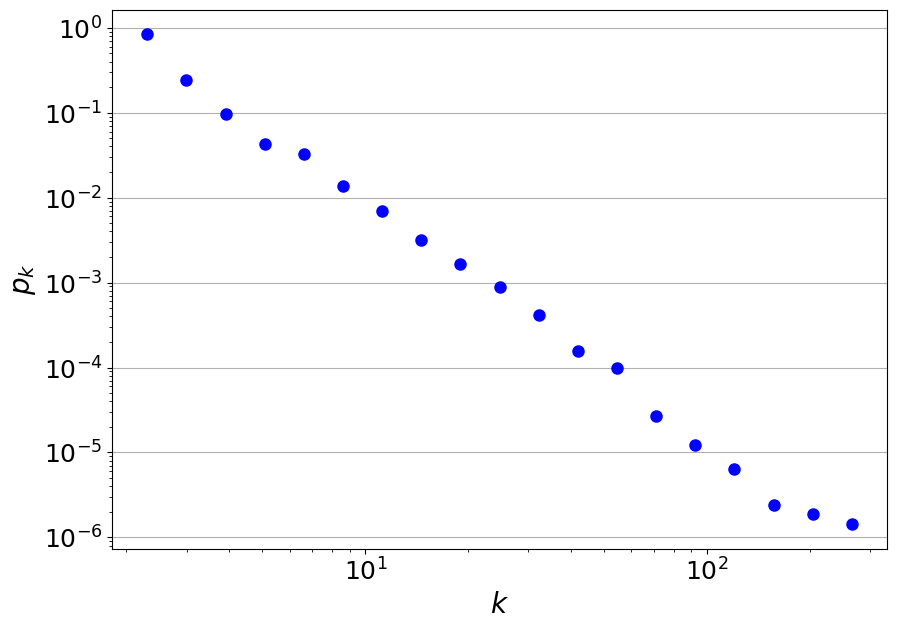

In [8]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_delta, p_k_delta, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()


#### Network generated with a uniform fitness distribution

In [9]:
# Initialization
network_uniform = model.network(m0, m)
network_uniform.set_fitness_distr('uniform')

In [10]:
# Generate the network
network_uniform.generate_network(n)

# Get the degree distribution of the network
p_k_uniform, k_uniform = network_uniform.get_degree_distr()

In [11]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_uniform = np.delete(k_uniform, np.argwhere(p_k_uniform==0))
y_uniform = np.delete(p_k_uniform, np.argwhere(p_k_uniform==0))
# Transform to log scale
x_uniform = np.log10(x_uniform)
y_uniform = np.log10(y_uniform)

# Linear regression (slope is the exponent)
slope_uniform, intercept_uniform, r_value_uniform, _, _ = linregress(x_uniform, y_uniform)

print('The power law exponent of the degree distribution using a uniform fitness distribution is %s'% np.round(-slope_uniform, 3))

The power law exponent of the degree distribution using a uniform fitness distribution is 2.582


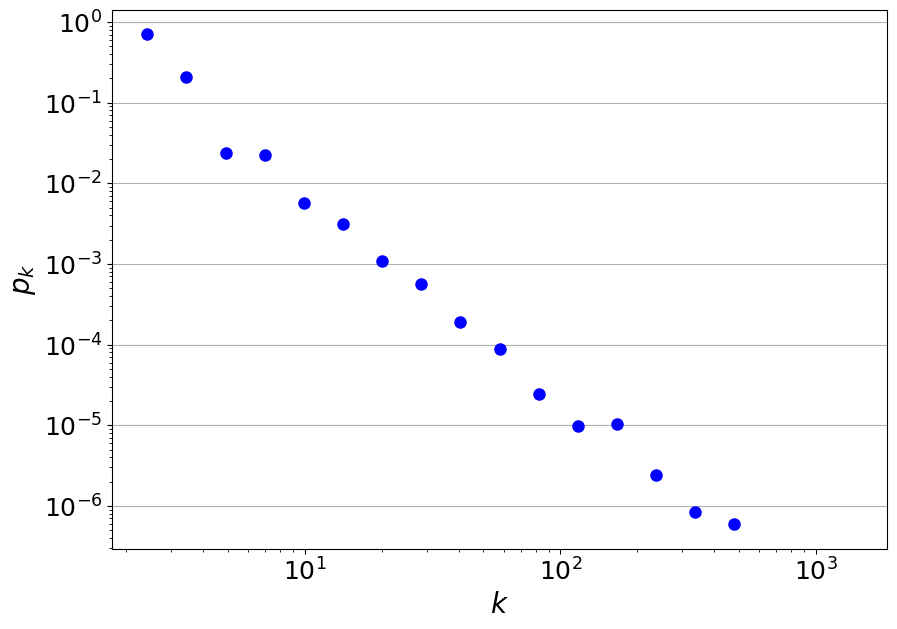

In [12]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_uniform, p_k_uniform, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Network generated with an exponential fitness distribution

In [13]:
# Initialization
network_exp = model.network(m0, m)
network_exp.set_fitness_distr('exponential')

In [14]:
# Generate the network
network_exp.generate_network(n)

# Get the degree distribution of the network
p_k_exp, k_exp = network_exp.get_degree_distr()

In [15]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_exp = np.delete(k_exp, np.argwhere(p_k_exp==0))
y_exp = np.delete(p_k_exp, np.argwhere(p_k_exp==0))
# Transform to log scale
x_exp = np.log10(x_exp)
y_exp = np.log10(y_exp)

# Linear regression (slope is the exponent)
slope_exp, intercept_exp, r_value_exp, _, _ = linregress(x_exp, y_exp)

print('The power law exponent of the degree distribution using a exponential fitness distribution is %s'% np.round(-slope_exp, 3))


The power law exponent of the degree distribution using a exponential fitness distribution is 2.136


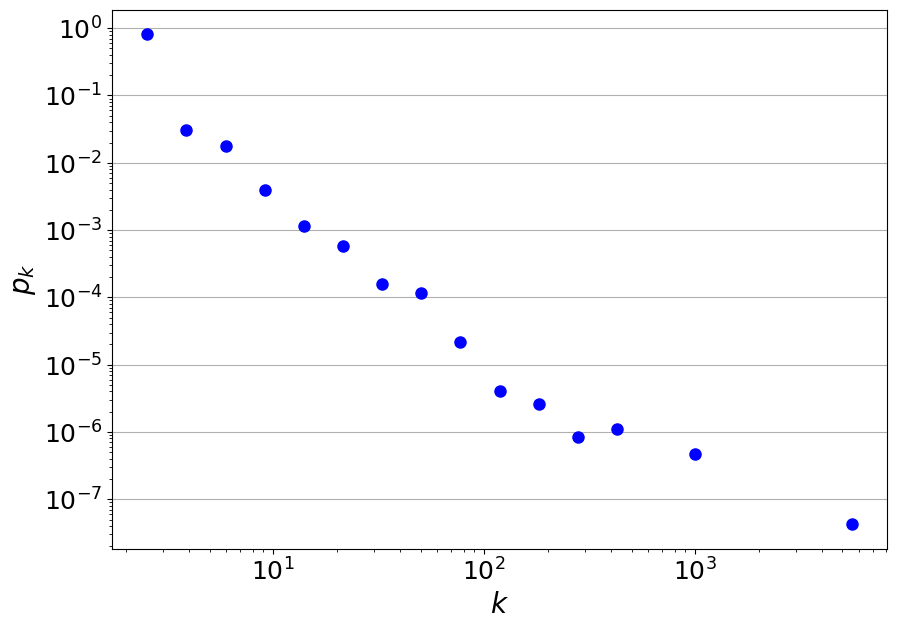

In [16]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_exp, p_k_exp, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Comparison of degree distribution

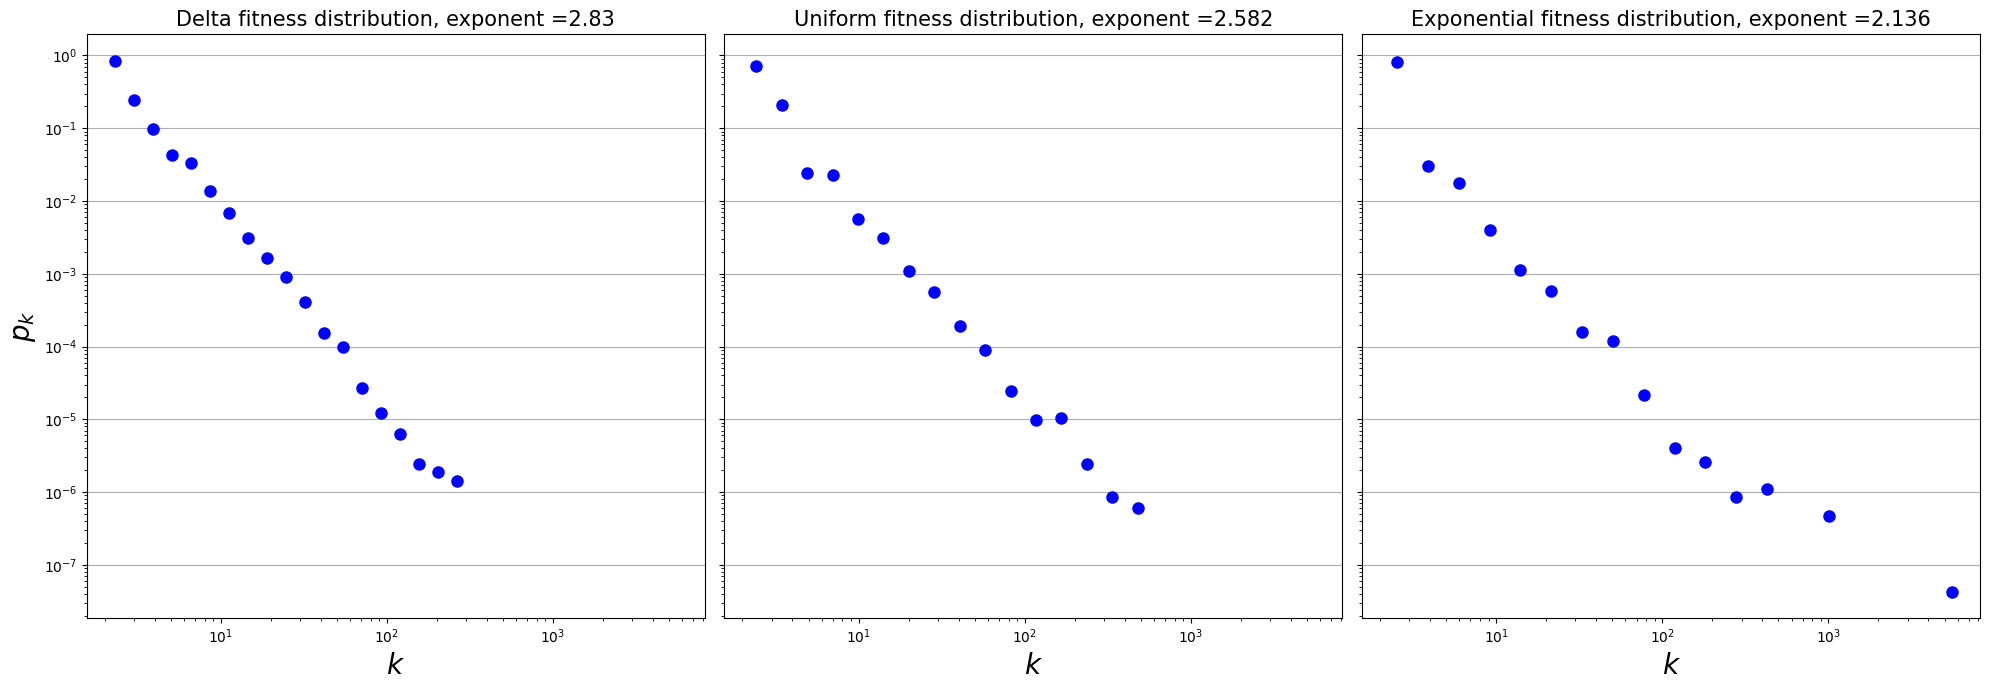

In [17]:
fig, axs = plt.subplots(1,3, figsize = (20,7), sharex=True, sharey=True)

axs[0].set_title('Delta fitness distribution, exponent ='+ str(round(-slope_delta, 3)), fontsize=15)
axs[0].loglog(k_delta, p_k_delta, 'bo', markersize=8)
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)

axs[1].set_title('Uniform fitness distribution, exponent ='+ str(round(-slope_uniform, 3)), fontsize=15)
axs[1].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[1].set_xlabel('$k$', fontsize=20)

axs[2].set_title('Exponential fitness distribution, exponent ='+ str(round(-slope_exp, 3)), fontsize=15)
axs[2].loglog(k_exp, p_k_exp, 'bo', markersize=8)
axs[2].set_xlabel('$k$', fontsize=20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [18]:
network_delta = model.network(m0, m)
network_delta.set_fitness_distr('delta')
degrees = network_delta.generate_network(n)
l_list = []
for i in range(len(degrees)):
    l = degrees[i][0]
    l_list.append(len(l))

In [19]:
degree_distribution = l_list

fit_powerlaw = powerlaw.Fit(degree_distribution)
R, p = fit_powerlaw.distribution_compare('power_law', 'exponential', normalized_ratio=True)

fit_stretched_exp = stats.exponweib.fit(degree_distribution, floc=0, f0=1)
D, p_stretched_exp = stats.kstest(degree_distribution, stats.exponweib(*fit_stretched_exp).pdf)

if R > 0 and p < 0.05:
    print("The degree distribution follows a power law.")
if D > 0 and p_stretched_exp < 0.05:
    print("The degree distribution follows a stretched exponential distribution.")
else:
    print("The degree distribution does not follow a power law or a stretched exponential distribution.")

Calculating best minimal value for power law fit
The degree distribution follows a power law.
The degree distribution follows a stretched exponential distribution.


In [20]:
fit_stretched_exp

(1, 1.1528114249303554, 0, 4.27291981466848)

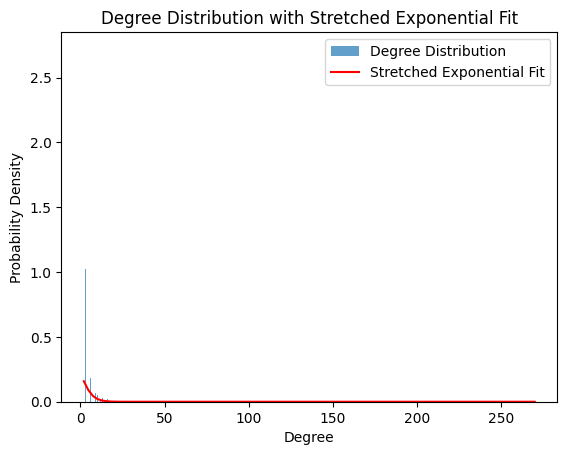

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming degree_distribution is your array of degree values

# Step 2: Fit the degree distribution to the stretched exponential distribution
fit_stretched_exp = stats.exponweib.fit(degree_distribution, floc=0, f0=1)

# Step 3: Generate a range of x values
x = np.linspace(min(degree_distribution), max(degree_distribution), 100)

# Step 4: Calculate the PDF of the fitted distribution
pdf = stats.exponweib.pdf(x, *fit_stretched_exp)

# Step 5: Plot the original degree distribution as a histogram
plt.hist(degree_distribution, bins='auto', density=True, alpha=0.7, label='Degree Distribution')

# Step 6: Plot the fitted stretched exponential distribution
plt.plot(x, pdf, 'r-', label='Stretched Exponential Fit')

# Step 7: Add labels and title
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution with Stretched Exponential Fit')

# Step 8: Display the plot
plt.show()


In [6]:
ditribution_list = [ 'delta', 'uniform', 'exponential']

# Cannot get the right imports but once that is fixed, run code for these
# distirbution_list =  ['bb', 'poisson','delta', 'uniform', 'exponential']

avg_path_lengths, avg_clusterings, clusterings = [], [], []
diameters, assortativities = [], []

for dist in ditribution_list:   
    print('Distirbution:', dist)
    # Initialization
    network_exp = model.network(m0, m)
    network_exp.set_fitness_distr(dist)

    degrees = network_exp.generate_network(n)

    G = nx.Graph()

    # Add nodes
    for node, (edges, fitness) in degrees.items():
        G.add_node(node, fitness=fitness)

    # Add edges
    for node, (edges, fitness) in degrees.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)

    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)
    print("Average path length:", avg_path_length)
    
    avg_clustering_coefficient = nx.average_clustering(G)
    avg_clusterings.append(avg_clustering_coefficient) 
    print("Average clustering coefficient:", avg_clustering_coefficient) 
    
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)

    # Sort nodes by degree centrality in descending order
    sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

    # Print top 5 highly connected hubs
    print("Highly connected hubs:")
    for node in sorted_nodes[:5]:
        print("Node:", node, "Degree Centrality:", degree_centrality[node])
        
    r = nx.degree_assortativity_coefficient(G)
    print('check if there is preferential attackment:', r)
    
    num_attacks = 10  # Number of hubs to remove
    removed_hubs = sorted_nodes[:num_attacks]

    print("Initial number of connected components:", nx.number_connected_components(G))

    # Remove the targeted hubs
    for hub in removed_hubs:
        G.remove_node(hub)

    print("Number of connected components after attacks:", nx.number_connected_components(G))
    
    # Calculate clustering coefficient of the Barabási-Albert network
    clustering_coefficient = nx.average_clustering(G)
    clusterings.append(clustering_coefficient)
    print("Clustering coefficient of the BB-network:", clustering_coefficient)
    
    


Distirbution: delta
Average path length: 5.015953495349535
Average clustering coefficient: 0.00498050809929387
Highly connected hubs:
Node: 2 Degree Centrality: 0.034103410341034104
Node: 0 Degree Centrality: 0.0316031603160316
Node: 40 Degree Centrality: 0.011301130113011301
Node: 15 Degree Centrality: 0.011101110111011102
Node: 3 Degree Centrality: 0.010501050105010502
check if there is preferential attackment: -0.03142087757766018
Initial number of connected components: 1
Number of connected components after attacks: 16
Clustering coefficient of the BB-network: 0.001373203232538082
Distirbution: uniform
Average path length: 4.2028763476347635
Average clustering coefficient: 0.03181477238190965
Highly connected hubs:
Node: 1 Degree Centrality: 0.1354135413541354
Node: 7 Degree Centrality: 0.0427042704270427
Node: 13 Degree Centrality: 0.04050405040504051
Node: 34 Degree Centrality: 0.024302430243024302
Node: 5 Degree Centrality: 0.0233023302330233
check if there is preferential attac

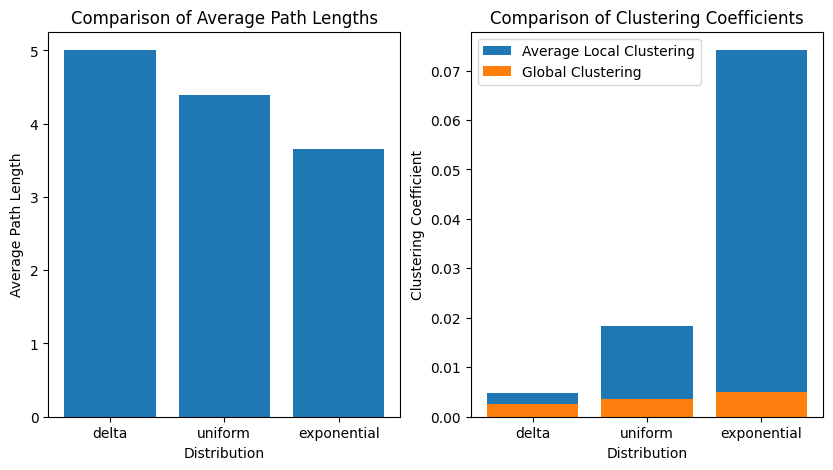

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(ditribution_list, avg_path_lengths)
plt.xlabel('Distribution')
plt.ylabel('Average Path Length')
plt.title('Comparison of Average Path Lengths')

plt.subplot(1, 2, 2)
plt.bar(ditribution_list, avg_clusterings, label='Average Local Clustering')
plt.bar(ditribution_list, clusterings, label='Global Clustering')
plt.xlabel('Distribution')
plt.ylabel('Clustering Coefficient')
plt.title('Comparison of Clustering Coefficients')
plt.legend()
